Help is availabe on : https://www.youtube.com/watch?v=Rgr_3iXORmo

In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 3.7MB/s 
     |████████████████████████████████| 112kB 48.0MB/s 
     |████████████████████████████████| 2.0MB 28.1MB/s 
     |████████████████████████████████| 14.2MB 265kB/s 
     |████████████████████████████████| 276kB 48.6MB/s 
     |████████████████████████████████| 174kB 53.4MB/s 
     |████████████████████████████████| 6.8MB 25.2MB/s 
     |████████████████████████████████| 245kB 37.3MB/s 
     |████████████████████████████████| 1.4MB 31.6MB/s 
     |████████████████████████████████| 1.7MB 32.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 153kB 44.1MB/s 
     |████████████████████████████████| 163kB 45.3MB/s 
     |████████████████████████████████| 81kB 6.9MB/s

In [4]:
import pandas as pd
data = pd.read_csv('delaware_anomaly.csv')

In [5]:
data.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2014,-5.50
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,18.31
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,21.61
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,22.39
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,5.44


In [6]:
data['CAT_DESCR'].value_counts()

Eating Places Restaurants                            1544
EATING PLACES RESTAURANTS                             986
Stationery-Office Supplies-Printing Writing Pap       909
Lodging                                               889
Airline                                               604
                                                     ... 
MISCELLANEOUS REPAIR SHOPS AND RELATED SERVICES         1
Schools Correspondence                                  1
Attorneys Legal Services                                1
MOTION PICTURE-VIDEO TAPE PRODUCTION-DISTRIBUTION       1
Glass Paint Wallpaper Stores                            1
Name: CAT_DESCR, Length: 208, dtype: int64

In [7]:
data['DEPT_NAME'].value_counts() #drop this unnecessary feaure

DEPT OF EDUCATION    15156
Name: DEPT_NAME, dtype: int64

In [8]:
data['MERCHANT'].value_counts()

WB MASON                  293
AMAZON.COM                211
VZWRLSS*IVR VB            166
AMAZON MKTPLACE PMTS      163
USPS PO 0917600901        157
                         ... 
YOURMEMBER-CAREERS          1
UPS*ADJ00159559992581       1
STAPLES ACCOUN00687632      1
STAPLS0161449820000001      1
STAPLS7151217681000001      1
Name: MERCHANT, Length: 5802, dtype: int64

In [9]:
data['DIV_NAME'].value_counts()

DEPARTMENT OF EDUCATION           4675
Department of Education           4020
Office of the Secretary           1081
Special Needs Programs            1019
Operations Support                 693
SPECIAL NEEDS PROGRAMS             692
Education Block Grants             581
EDUCATION BLOCK GRANTS             445
Academic Support                   431
Student Support                    332
Other Items                        255
Office of Early Learning           253
E Education Block Grants           204
Educator Support                   181
ADVISORY COUNCIL                   128
TRANSPORTATION                      44
Public School Transportation        27
Transportation                      25
Driver Training                     23
State Board of Education            22
DRIVER TRAINING                      9
Professional Standards Board         6
Adult Education and Work Force       6
E Transportation                     3
OTHER ITEMS                          1
Name: DIV_NAME, dtype: in

In [10]:
data.shape

(15156, 8)

In [11]:
data.dtypes

FISCAL_YEAR          int64
FISCAL_PERIOD        int64
DEPT_NAME           object
DIV_NAME            object
MERCHANT            object
CAT_DESCR           object
TRANS_DT            object
MERCHANDISE_AMT    float64
dtype: object

In [12]:
from pycaret.anomaly import *


In [13]:
setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(15156, 8)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,6
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(15156, 6078)"
9,CPU Jobs,-1


({'abod': <pycaret.containers.models.anomaly.ABODAnomalyContainer at 0x7efe9317d950>,
  'cluster': <pycaret.containers.models.anomaly.CBLOFAnomalyContainer at 0x7efe931836d0>,
  'cof': <pycaret.containers.models.anomaly.COFAnomalyContainer at 0x7efe93183650>,
  'histogram': <pycaret.containers.models.anomaly.HBOSAnomalyContainer at 0x7efe93183850>,
  'iforest': <pycaret.containers.models.anomaly.IForestAnomalyContainer at 0x7efe931837d0>,
  'knn': <pycaret.containers.models.anomaly.KNNAnomalyContainer at 0x7efe93183910>,
  'lof': <pycaret.containers.models.anomaly.LOFAnomalyContainer at 0x7efe93183a50>,
  'mcd': <pycaret.containers.models.anomaly.MCDAnomalyContainer at 0x7efe931838d0>,
  'pca': <pycaret.containers.models.anomaly.PCAAnomalyContainer at 0x7efe93183e10>,
  'sod': <pycaret.containers.models.anomaly.SODAnomalyContainer at 0x7efe93183f50>,
  'sos': <pycaret.containers.models.anomaly.SOSAnomalyContainer at 0x7efe9318d050>,
  'svm': <pycaret.containers.models.anomaly.OCSVMAnom

In [14]:
get_config('X').columns

Index(['MERCHANDISE_AMT', 'FISCAL_YEAR_2015', 'FISCAL_YEAR_2016',
       'FISCAL_YEAR_2017', 'FISCAL_YEAR_2018', 'FISCAL_YEAR_2019',
       'FISCAL_YEAR_2020', 'FISCAL_PERIOD_1', 'FISCAL_PERIOD_10',
       'FISCAL_PERIOD_11',
       ...
       'TRANS_DT_weekday_1', 'TRANS_DT_weekday_2', 'TRANS_DT_weekday_3',
       'TRANS_DT_weekday_4', 'TRANS_DT_weekday_5', 'TRANS_DT_weekday_6',
       'TRANS_DT_is_month_end_0', 'TRANS_DT_is_month_end_1',
       'TRANS_DT_is_month_start_0', 'TRANS_DT_is_month_start_1'],
      dtype='object', length=6078)

In [15]:
s = setup(data, session_id = 123,
          ignore_features = ['CAT_DESCR'], high_cardinality_features= ['MERCHANT'],
          numeric_features = ['FISCAL_YEAR', 'FISCAL_PERIOD' ])

,Description,Value
0,session_id,123
1,Original Data,"(15156, 8)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,True
7,High Cardinality Method,frequency
8,Transformed Data,"(15156, 53)"
9,CPU Jobs,-1


In [16]:
get_config('X').columns

Index(['FISCAL_YEAR', 'FISCAL_PERIOD', 'MERCHANT', 'MERCHANDISE_AMT',
       'DEPT_NAME_DEPT OF EDUCATION', 'DIV_NAME_ADVISORY COUNCIL',
       'DIV_NAME_Academic Support', 'DIV_NAME_Adult Education and Work Force',
       'DIV_NAME_DEPARTMENT OF EDUCATION', 'DIV_NAME_DRIVER TRAINING',
       'DIV_NAME_Department of Education', 'DIV_NAME_Driver Training',
       'DIV_NAME_E Education Block Grants', 'DIV_NAME_E Transportation',
       'DIV_NAME_EDUCATION BLOCK GRANTS', 'DIV_NAME_Education Block Grants',
       'DIV_NAME_Educator Support', 'DIV_NAME_OTHER ITEMS',
       'DIV_NAME_Office of Early Learning', 'DIV_NAME_Office of the Secretary',
       'DIV_NAME_Operations Support', 'DIV_NAME_Other Items',
       'DIV_NAME_Professional Standards Board',
       'DIV_NAME_Public School Transportation',
       'DIV_NAME_SPECIAL NEEDS PROGRAMS', 'DIV_NAME_Special Needs Programs',
       'DIV_NAME_State Board of Education', 'DIV_NAME_Student Support',
       'DIV_NAME_TRANSPORTATION', 'DIV_NAME_T

In [17]:
iforest = create_model('iforest')

In [18]:
r = assign_model(iforest)
r.head()

,FISCAL_YEAR,FISCAL_PERIOD,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESCR,TRANS_DT,MERCHANDISE_AMT,Anomaly,Anomaly_Score
0,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2014,-5.50,0,-0.081450
1,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,18.31,0,-0.071574
2,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,21.61,0,-0.071574
3,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,22.39,0,-0.071574
4,2015,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2014,5.44,0,-0.071310


In [19]:
get_config('X')

,FISCAL_YEAR,FISCAL_PERIOD,MERCHANT,MERCHANDISE_AMT,DEPT_NAME_DEPT OF EDUCATION,DIV_NAME_ADVISORY COUNCIL,DIV_NAME_Academic Support,DIV_NAME_Adult Education and Work Force,DIV_NAME_DEPARTMENT OF EDUCATION,DIV_NAME_DRIVER TRAINING,DIV_NAME_Department of Education,DIV_NAME_Driver Training,DIV_NAME_E Education Block Grants,DIV_NAME_E Transportation,DIV_NAME_EDUCATION BLOCK GRANTS,DIV_NAME_Education Block Grants,DIV_NAME_Educator Support,DIV_NAME_OTHER ITEMS,DIV_NAME_Office of Early Learning,DIV_NAME_Office of the Secretary,DIV_NAME_Operations Support,DIV_NAME_Other Items,DIV_NAME_Professional Standards Board,DIV_NAME_Public School Transportation,DIV_NAME_SPECIAL NEEDS PROGRAMS,DIV_NAME_Special Needs Programs,DIV_NAME_State Board of Education,DIV_NAME_Student Support,DIV_NAME_TRANSPORTATION,DIV_NAME_Transportation,TRANS_DT_month_1,TRANS_DT_month_10,TRANS_DT_month_11,TRANS_DT_month_12,TRANS_DT_month_2,TRANS_DT_month_3,TRANS_DT_month_4,TRANS_DT_month_5,TRANS_DT_month_6,TRANS_DT_month_7,TRANS_DT_month_8,TRANS_DT_month_9,TRANS_DT_weekday_0,TRANS_DT_weekday_1,TRANS_DT_weekday_2,TRANS_DT_weekday_3,TRANS_DT_weekday_4,TRANS_DT_weekday_5,TRANS_DT_weekday_6,TRANS_DT_is_month_end_0,TRANS_DT_is_month_end_1,TRANS_DT_is_month_start_0,TRANS_DT_is_month_start_1
0,2015.0,1.0,1.0,-5.500000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2015.0,1.0,4.0,18.309999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2015.0,1.0,4.0,21.610001,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2015.0,1.0,4.0,22.389999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2015.0,1.0,4.0,5.440000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15151,2020.0,6.0,7.0,52.580002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15152,2020.0,6.0,16.0,14.910000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
15153,2020.0,6.0,16.0,111.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
15154,2020.0,6.0,2.0,99.989998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


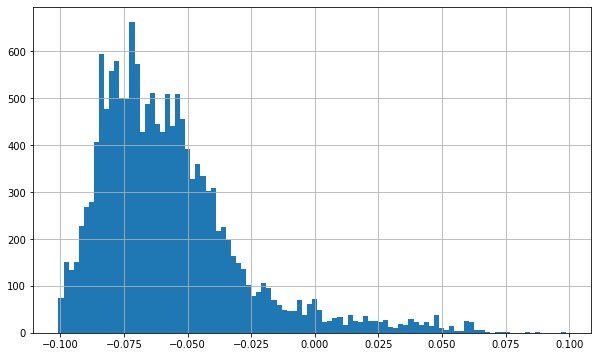

In [20]:
r['Anomaly_Score'].hist(bins=100, figsize=(10,6))

--------------------------------